In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [5]:
X,y=make_blobs(n_samples=1000, centers=3,n_features=2)

In [6]:
X

array([[ 6.34345712, -6.01906069],
       [ 0.96060724,  5.22656352],
       [ 4.53571454, -6.26913499],
       ...,
       [ 0.65560185,  4.03967061],
       [ 4.45604249, -6.30206146],
       [ 1.44053641,  2.9947573 ]])

In [7]:
y

array([0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 2, 0, 2, 0, 1,
       0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 2, 1, 0, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2,
       2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 1, 1,
       2, 2, 0, 1, 1, 2, 2, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 2,
       0, 1, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 1, 2,
       1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0,
       1, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2,

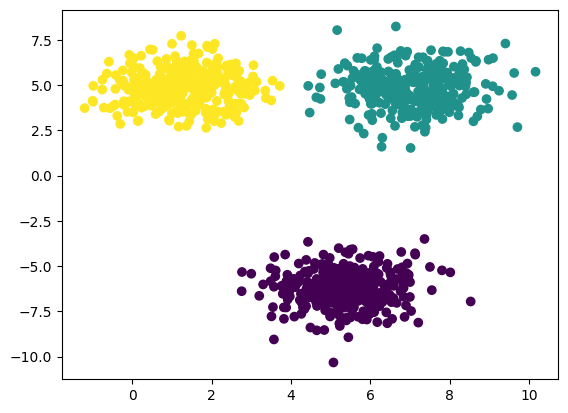

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

In [9]:
# Standardization: Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
x_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [14]:
# Elbow Method
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[1340.0,
 662.74994014696,
 111.00358206352541,
 93.96801567224082,
 73.34061697605033,
 55.51112883349773,
 64.98427386012413,
 45.58428542506156,
 39.92300160672289,
 37.579448800081785]

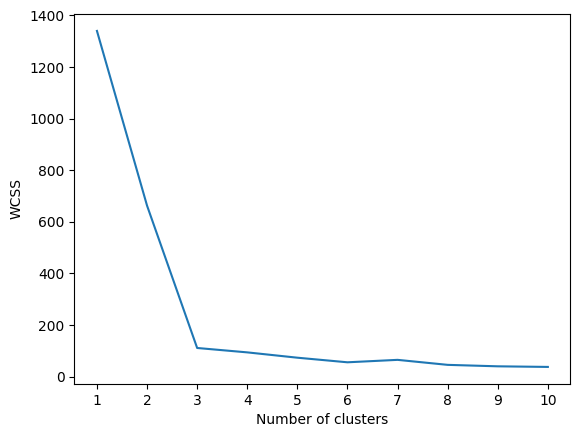

In [16]:
# Plot Elbow Curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# k = 3 is a good value

In [17]:
kmeans=KMeans(n_clusters=3,init='k-means++')

In [18]:
kmeans.fit_predict(X_train_scaled)

array([1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 2, 2, 0, 0, 1, 0, 0,
       0, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1,
       0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 0, 2, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 1, 2,
       1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 1, 0, 2, 1, 2,
       2, 0, 2, 2, 1, 2, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       1, 2, 0, 2, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1,
       2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 2, 2,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 1, 2, 1,
       2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 0, 2, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 1,
       0, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1,

In [19]:
y_pred=kmeans.predict(x_test_scaled)

In [20]:
y_pred

array([1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 1, 1, 0, 2, 2, 2, 1,
       1, 1, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 1, 0, 2, 2, 0, 0,
       2, 2, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 2, 1,
       0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2,
       1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2,
       2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1,
       0, 0, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 1, 0, 0, 0, 0, 2, 1,
       1, 2, 1, 0, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2, 2,

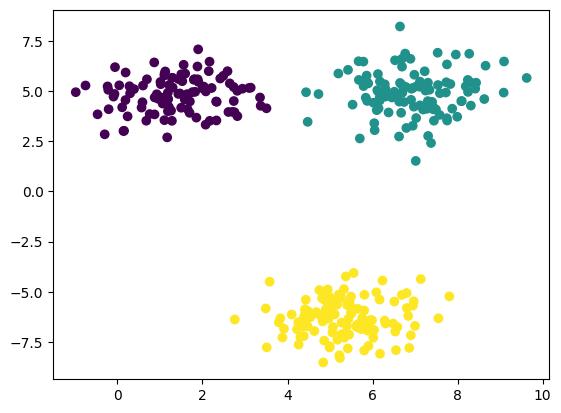

In [21]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [22]:
## Validating k valuw with Silhouette Score
!pip install kneed

In [23]:
from kneed import KneeLocator

In [24]:
k1 = KneeLocator(range(1,11), wcss, curve='convex', direction='decreasing')
k1.elbow

3

In [25]:
# Silhouette Score
from sklearn.metrics import silhouette_score

In [27]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

In [ ]:
silhouette_coefficients

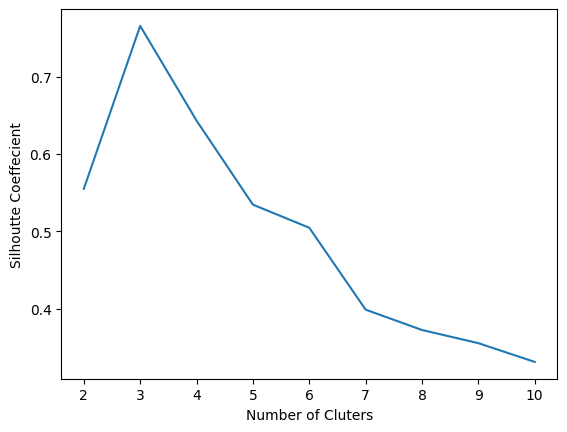

In [28]:
# plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()
# Highest score/point is the k value